In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

# sklearn KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics 
from sklearn.decomposition import PCA

import nltk
nltk.download('stopwords')
nltk.download('punkt')

import regex as re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Import the forums dataset.
forums = pd.read_pickle("forums.pkl")
forums.sample(3)

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,...,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
1254,My brother is preparing to pay another year of...,0.005502,0.185274,0.033948,0.026204,0.061540,-0.047038,-0.055609,-0.095557,0.036137,...,-0.191311,-0.036423,0.098768,-0.013839,-0.053071,-0.025482,-0.009482,-0.027293,0.020454,-0.041090
995,I have a Hewlett-Packard LaserJet Series II Pa...,-0.105069,0.233148,-0.023807,-0.170863,0.079537,-0.041546,-0.054816,-0.218080,0.097615,...,-0.256935,-0.060172,0.143433,-0.041390,-0.075772,-0.034879,-0.076691,-0.056162,-0.011438,0.055099
370,"Web of Spiderman--Auction ListISSUES #1-92, AN...",-0.090156,0.216021,-0.079014,0.006804,0.092676,-0.071613,-0.076490,-0.047212,-0.046233,...,-0.174691,0.022513,0.024071,-0.080160,-0.112513,0.039725,0.035433,-0.128095,0.098098,-0.077109


In [37]:
len(forums.columns)

301

In [38]:
# Check to see if there is any identicle column
for x in forums:
    for y in forums:
        if(forums[x].equals(forums[y]) and x!=y):
            print(x,y)
    

In [39]:
for col in forums.columns.values.tolist():
  if(forums[col].dtypes == "object"):
    forums[col] = forums[col].str.strip()

# Replace any empty string with nan
forums = forums.replace('', np.nan)  

In [40]:
forums.shape

(2362, 301)

In [41]:
forums.duplicated().sum()
forums.drop_duplicates(inplace=True)

In [42]:
forums.isna().sum()
forums.isna().sum().sum()
forums.dropna(inplace=True)

In [43]:
forums.dtypes
forums.describe().T

,count,mean,std,min,25%,50%,75%,max
e0,2303.0,-0.037338,0.053699,-0.622081,-0.061756,-0.034638,-0.008708,0.197311
e1,2303.0,0.166890,0.057020,-0.196960,0.134120,0.165717,0.198865,0.533470
e2,2303.0,-0.117869,0.067583,-0.490025,-0.160776,-0.122618,-0.077969,0.363830
e3,2303.0,-0.061495,0.051207,-0.393122,-0.087674,-0.059321,-0.031117,0.322405
e4,2303.0,0.081117,0.053203,-0.163500,0.048272,0.079026,0.112358,0.390160
...,...,...,...,...,...,...,...,...
e295,2303.0,-0.014446,0.050496,-0.352770,-0.040381,-0.012272,0.014695,0.263430
e296,2303.0,-0.044039,0.045675,-0.562870,-0.069640,-0.044689,-0.018464,0.237821
e297,2303.0,-0.071159,0.048826,-0.581665,-0.098201,-0.071217,-0.042779,0.179845
e298,2303.0,0.001852,0.058199,-0.501450,-0.027014,0.005330,0.034960,0.226430


In [44]:
stops = set(stopwords.words("english"))

In [45]:
def clean_content(text):
    #Converting text to lowercase characters
    text = text.lower()
    #Removing HTML tags
    text = re.sub(r'\<[^<>]*\>','', text) 
    #Removing any character which does not match to letter,digit or underscore
    text = re.sub(r'^\W+|\W+$',' ', text)
    #Removing space,newline,tab
    text = re.sub(r'\s',' ',text)
    #Removing punctuation
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    # Remove any numbers
    text = re.sub(r'[0-9]+', '', text)
    #Tokenizing data
    text = word_tokenize(text)
    #Removing stopwords
    text = [i for i in text if i not in stops]
    return(text)

In [46]:
forums['text'] = forums['text'].apply(lambda x: clean_content(x))

In [47]:
frms = forums.copy()
frms = frms.set_index("text")

In [48]:
frms.sample(2)

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
text,,,,,,,,,,,,,,,,,,,,,
"[auctioning, following, comics, minimum, bids, setbelow, would, normally, sell, make, offer, willaccept, highest, bid, auction, completed, title, minimum, current, alpha, flight, jim, lee, first, work, marvel, aliens, st, app, aliens, comics, st, prnt, may, amazing, spider, man, intro, new, green, goblin, amazing, spider, man, st, appearance, hobgoblin, archer, armstrong, frank, miller, smith, layton, avengers, st, appearance, x, factor, bloodshot, chromium, cover, bwsmith, cover, poster, daredevil, frank, miller, art, begins, dark, horse, presents, st, app, concrete, st, printing, h, r, corps, incredible, hulk, st, app, grey, hulk, since, incredible, hulk, st, mcfarlane, issue, incredible, hulk, grey, hulk, series, begins, incredible, hulk, ...]",-0.114799,0.161697,-0.016828,-0.005585,0.048185,0.000708,-0.045183,-0.11869,0.02015,1.197472,...,-0.165910,-0.006689,0.011743,-0.030767,-0.147874,0.030356,-0.056378,-0.108193,0.023016,-0.030297
"[pair, akg, headphones, sale, electrostaticdyanmic, headphone, dynamic, element, bottom, end, electrostaticfor, high, end, comfortable, sound, nice, arein, like, new, condition, would, like, cdn, pair, brett, maraldo]",0.025585,0.183082,-0.148851,-0.094773,0.145385,-0.000694,0.090133,-0.14590,0.03305,1.577294,...,-0.203782,0.063529,-0.017868,-0.108116,-0.026557,0.020610,0.002279,-0.073304,-0.011672,0.031490


In [49]:
#from pandas_profiling import ProfileReport as pr
#profile = pr(frms, minimal=True).to_notebook_iframe()

## Dimensionality Reduction

<AxesSubplot:>

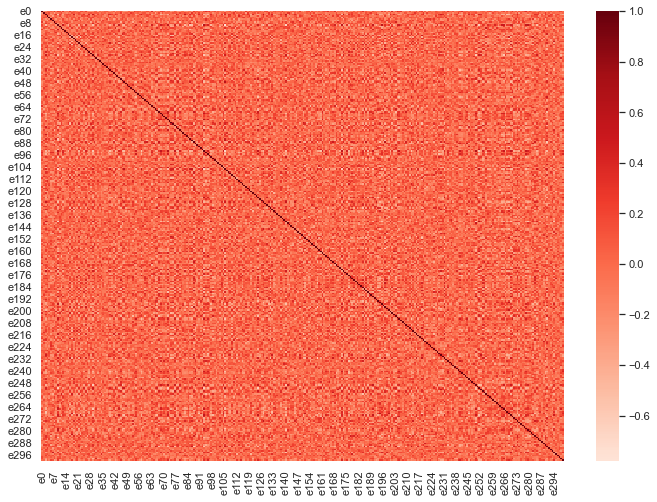

In [50]:
# what we need for today
sns.set(rc={'figure.figsize':(11.7,8.27)})
frm_corr = frms.corr()
sns.heatmap(frm_corr, cmap="Reds", center=0)

In [51]:
pca = PCA()
pcs = pca.fit_transform(frms)
varexp = pca.explained_variance_ratio_

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


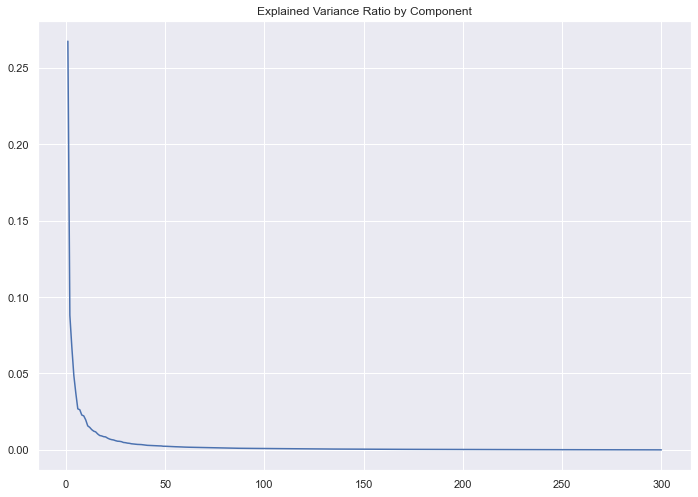

In [52]:
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1,len(varexp)+1), varexp)
plt.show()

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


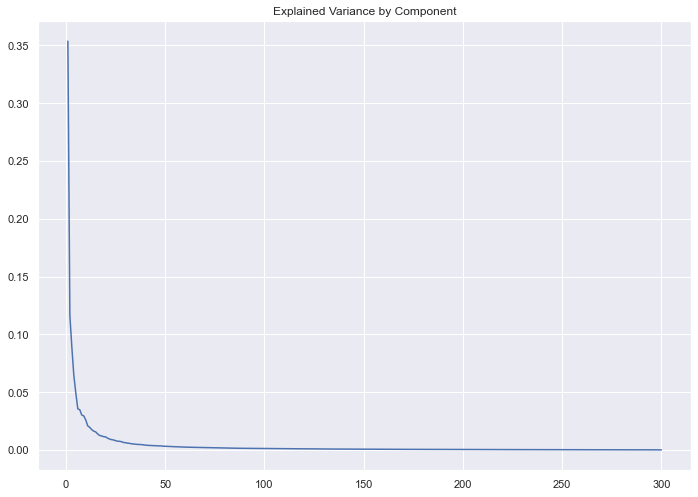

In [53]:
expl_var = pca.explained_variance_
plt.title("Explained Variance by Component")
sns.lineplot(range(1,len(varexp)+1), expl_var)
plt.show()

## Hierarchical clustering

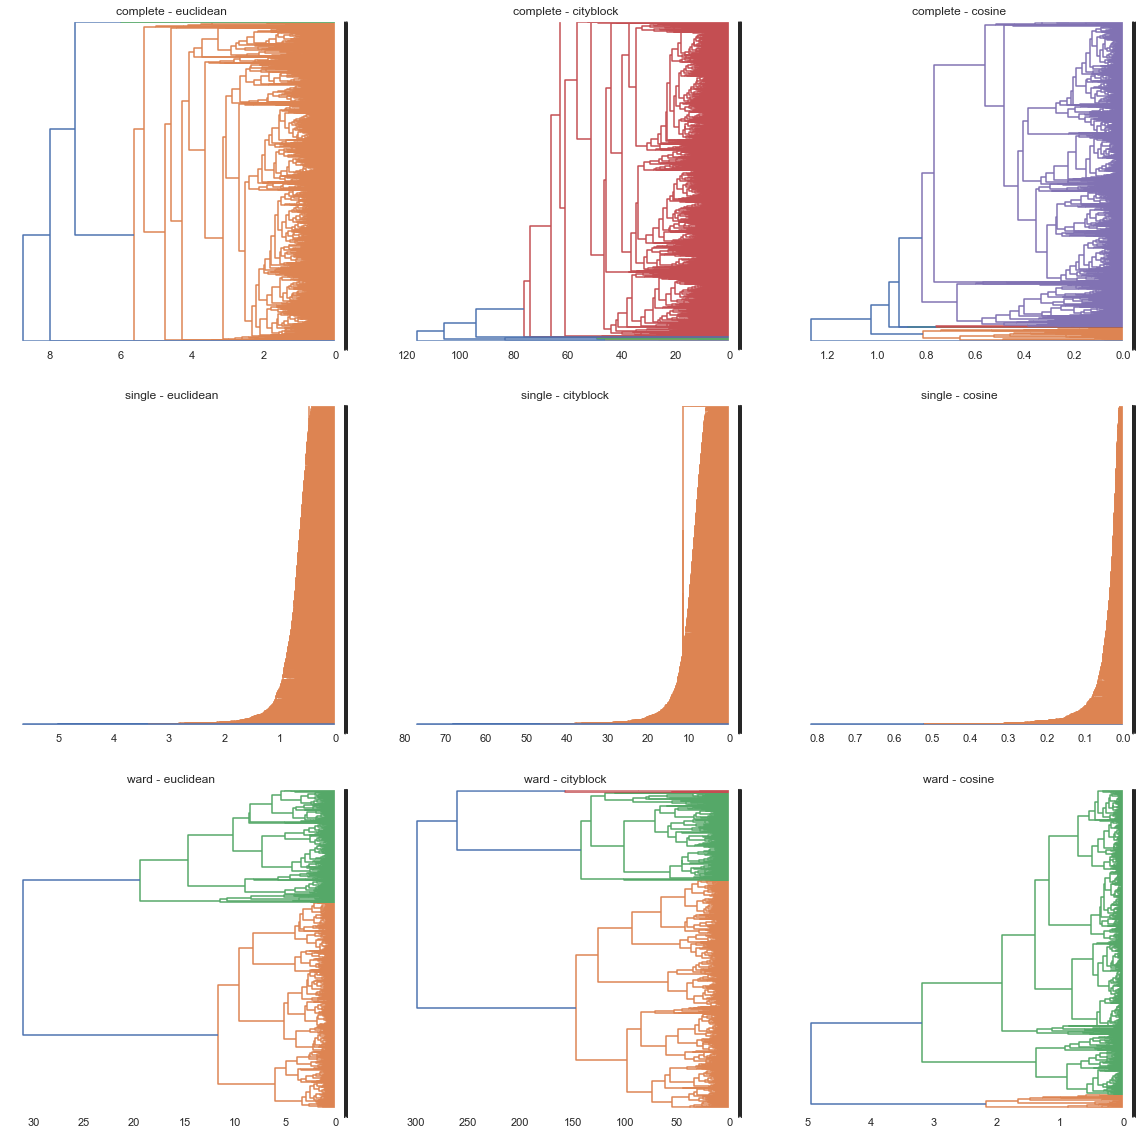

In [54]:
plt.figure(figsize=(20,20))

method = ['complete', 'single', 'ward']
metric = ['euclidean', 'cityblock', 'cosine']
linkage_dict = {}

ind = 0
for i,mtd in enumerate(method):
    for j,met,  in enumerate(metric):
        d0=pdist(frms, metric=met)
        ind = ind+1
        link = linkage(d0,method=mtd)
        linkage_dict[mtd +" - " +met] = link
        plt.subplot(3,3, ind)
        plt.title(mtd +" - " +met)
        dendrogram(link,
            #  labels = ps.index,
             leaf_rotation=90,
            #  leaf_font_size=10,
             orientation="left")
  
plt.show()    


In [55]:
corr = {}
for key,val in linkage_dict.items():
    cop = cophenet(linkage_dict[key])
    corr[key] = np.corrcoef(d0, cop)[0,1]
    
corr    

{'complete - euclidean': 0.7551717128657293,
 'complete - cityblock': 0.6334041577026841,
 'complete - cosine': 0.706581870084599,
 'single - euclidean': 0.6700827837057078,
 'single - cityblock': 0.6305742220097813,
 'single - cosine': 0.7258886479411228,
 'ward - euclidean': 0.3565508599035848,
 'ward - cityblock': 0.40756300583798033,
 'ward - cosine': 0.6400706418662213}

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


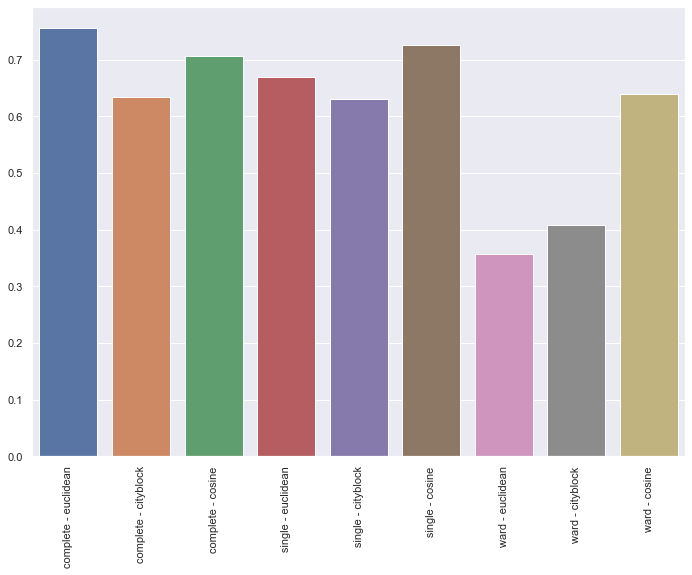

In [56]:
bar_plot = sns.barplot(list(corr.keys()),list(corr.values()))
plt.xticks(rotation=90)
plt.show()

### Looking at the dendograms 3 or 4 cluster

In [83]:
forums['her_cluster_3'] = fcluster(linkage_dict["ward - cityblock"], 2, criterion="maxclust")
forums['her_cluster_4'] = fcluster(linkage_dict["ward - cityblock"], 4, criterion="maxclust")

## K-Mean Clustering

In [84]:
inertia = []
silhouette = []
for i in range(2,10):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(frms)
    kmeans_lab = kmeans.predict(frms)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(frms, kmeans_lab))

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='Number of clusters', ylabel='Inertia'>

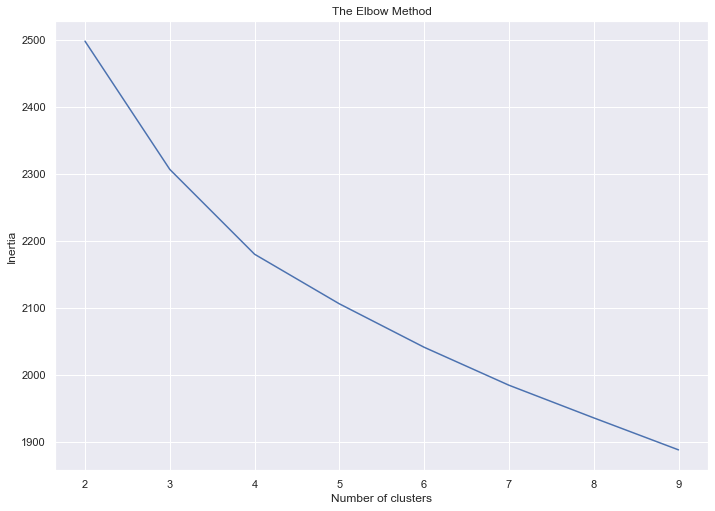

In [59]:
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
sns.lineplot(range(2,10),inertia)

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The Silhouette Method'}, xlabel='Average Silhouette Width', ylabel='Inertia'>

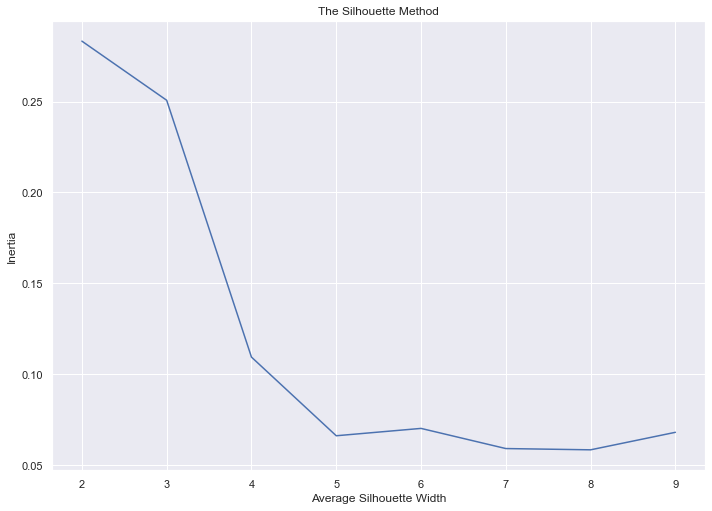

In [60]:
plt.title('The Silhouette Method')
plt.xlabel('Average Silhouette Width')
plt.ylabel('Inertia')
sns.lineplot(range(2,10),silhouette)

In [86]:
k3 = KMeans(3)
k3.fit(frms)
k3_labs = k3.predict(frms)
forums["kmean_cluster_3"] = k3_labs

In [62]:
k4 = KMeans(4)
k4.fit(frms)
k4_labs = k4.predict(frms)
forums["kmean_cluster_4"] = k4_labs

In [63]:
frm_cluster = forums[["her_cluster_3", "her_cluster_4","kmean_cluster_3", "kmean_cluster_4"]]
counts = frm_cluster.apply(pd.value_counts)
counts

,her_cluster_3,her_cluster_4,kmean_cluster_3,kmean_cluster_4
0,NaN,NaN,31.0,751.0
1,1643.0,1643.0,1679.0,1232.0
2,631.0,631.0,593.0,289.0
3,29.0,9.0,NaN,31.0
4,NaN,20.0,NaN,NaN


In [87]:
print(forums['her_cluster_3'].value_counts(normalize=True) * 100)
print(forums['her_cluster_4'].value_counts(normalize=True) * 100)

print(forums['kmean_cluster_3'].value_counts(normalize=True) * 100)
print(forums['kmean_cluster_4'].value_counts(normalize=True) * 100)

1    71.341728
2    28.658272
Name: her_cluster_3, dtype: float64
1    71.341728
2    27.399045
4     0.868432
3     0.390795
Name: her_cluster_4, dtype: float64
0    72.818063
1    25.792445
2     1.389492
Name: kmean_cluster_3, dtype: float64
1    53.495441
0    32.609640
2    12.548849
3     1.346070
Name: kmean_cluster_4, dtype: float64


<AxesSubplot:>

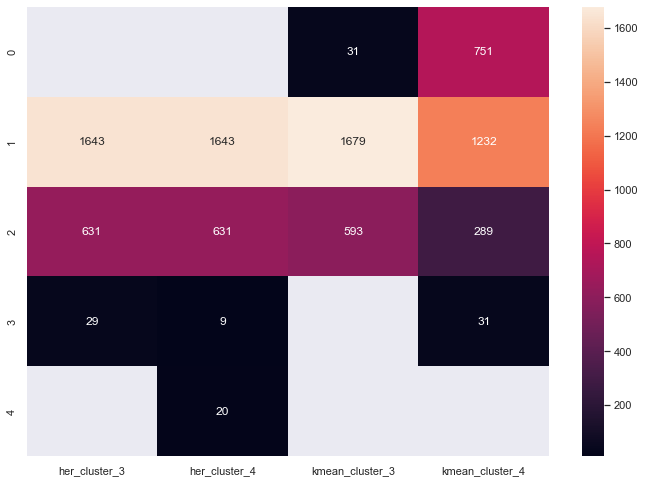

In [88]:
sns.heatmap(counts, annot=True, fmt='g')

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

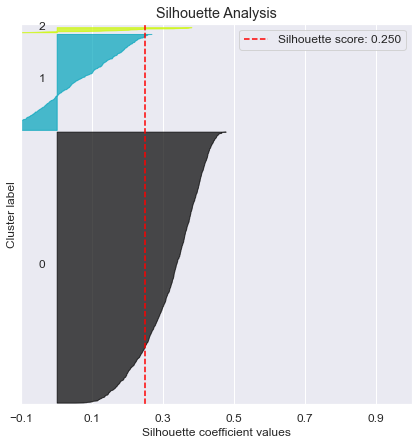

In [89]:
import scikitplot as skplt
skplt.metrics.plot_silhouette(frms, k3_labs, figsize=(7,7))

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

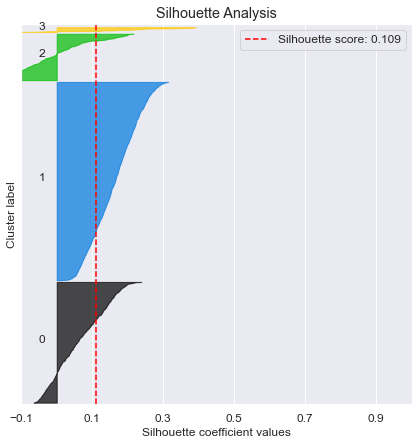

In [67]:
import scikitplot as skplt
skplt.metrics.plot_silhouette(frms, k4_labs, figsize=(7,7))

## Conclusion and trends

In [90]:
grouped_df_hie = forums.copy()
grouped_df_hie = grouped_df_hie.drop(["her_cluster_4", "kmean_cluster_3", "kmean_cluster_4"], axis=1)
grouped_df_hie = grouped_df_hie.groupby("her_cluster_3")

In [91]:
grouped_df_kmean = forums.copy()
grouped_df_kmean = grouped_df_kmean.drop(["her_cluster_4", "kmean_cluster_3", "her_cluster_3"], axis=1)
grouped_df_kmean = grouped_df_kmean.groupby("kmean_cluster_4")
grouped_df_kmean.mean()

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
kmean_cluster_4,,,,,,,,,,,,,,,,,,,,,
0,-0.037676,0.168353,-0.097340,-0.058111,0.086185,0.006321,0.009316,-0.127917,-0.000532,1.542724,...,-0.167858,0.010086,-0.001130,-0.022395,-0.007962,-0.015332,-0.032986,-0.076211,-0.015697,0.072690
1,-0.029836,0.163124,-0.148697,-0.065998,0.073232,0.007619,0.016381,-0.117909,-0.011121,1.935409,...,-0.166602,0.019821,-0.013723,-0.051572,0.039054,-0.015675,-0.055281,-0.065061,0.017909,0.084954
2,-0.061220,0.185805,-0.037702,-0.041143,0.092782,-0.004135,-0.004216,-0.117764,0.030807,0.923027,...,-0.102870,0.015304,-0.031292,-0.017562,-0.034265,0.003227,-0.026847,-0.083299,-0.010597,0.029995
3,-0.104667,0.104763,-0.137439,-0.154270,0.163000,0.061318,0.071602,-0.014830,0.023694,0.789437,...,0.381841,-0.029922,-0.048448,-0.036702,-0.031932,-0.108941,-0.025271,-0.077967,-0.095056,0.025166


## her_cluster_3

In [100]:
grouped_df_hie = forums.copy()
grouped_df_hie = grouped_df_hie.groupby('her_cluster_3').agg({'text': 'sum'}).reset_index()

In [101]:
grouped_df_hie.head()

,her_cluster_3,text
0,1,"[one, early, jet, fighters, also, think, germa..."
1,2,"[forsale, desktop, case, watt, power, supply, ..."


In [102]:
from collections import Counter

for i in range(len(grouped_df_hie)):
    words = grouped_df_hie['text'][i]
    most_common_words= [word for word, word_count in Counter(words).most_common(100)]
    print(most_common_words)
    

['would', 'one', 'space', 'like', 'get', 'also', 'know', 'time', 'think', 'team', 'first', 'good', 'game', 'could', 'year', 'much', 'well', 'use', 'new', 'two', 'people', 'even', 'see', 'go', 'jpeg', 'launch', 'need', 'may', 'years', 'make', 'season', 'program', 'back', 'anyone', 'please', 'play', 'image', 'way', 'last', 'games', 'hockey', 'nasa', 'us', 'since', 'thanks', 'want', 'got', 'system', 'better', 'file', 'bit', 'still', 'etc', 'many', 'used', 'e', 'graphics', 'software', 'earth', 'right', 'x', 'players', 'orbit', 'data', 'might', 'find', 'work', 'made', 'point', 'said', 'points', 'really', 'around', 'problem', 'let', 'looking', 'best', 'using', 'going', 'take', 'lot', 'moon', 'say', 'images', 'mail', 'look', 'something', 'c', 'files', 'little', 'another', 'next', 'nhl', 'lunar', 'high', 'available', 'satellite', 'great', 'probably', 'gif']
['space', 'new', 'x', 'edu', 'p', 'image', 'data', 'graphics', 'e', 'w', 'available', 'also', 'c', 'st', 'period', 'dos', 'one', 'mail', '

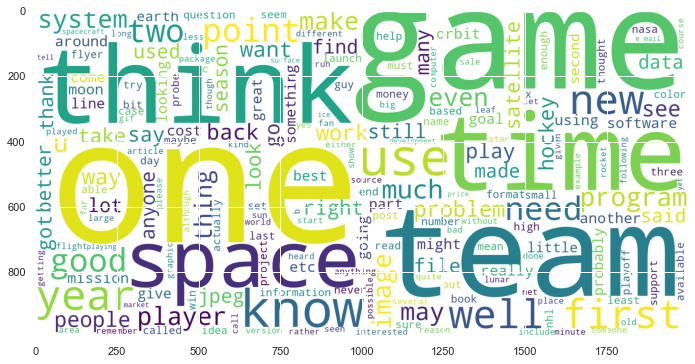

In [103]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_hie['text'][0]))
wordcloud2
plt.imshow(wordcloud2)

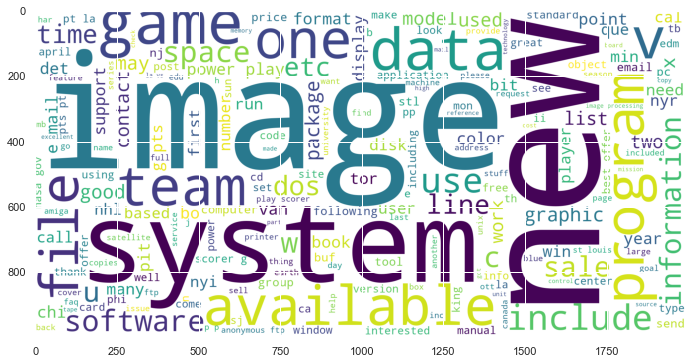

In [104]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_hie['text'][1]))
wordcloud2
plt.imshow(wordcloud2)

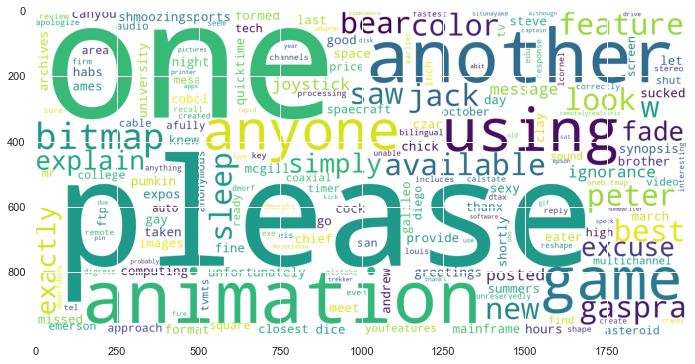

In [98]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_hie['text'][2]))
wordcloud2
plt.imshow(wordcloud2)

In [99]:
grouped_df_k_mean = forums.copy()
grouped_df_k_mean = grouped_df_k_mean.groupby('kmean_cluster_4').agg({'text': 'sum'}).reset_index()

In [77]:
len(grouped_df_k_mean)

4

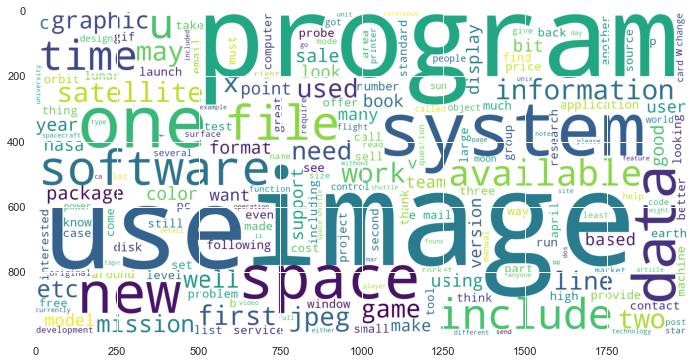

In [78]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_k_mean['text'][0]))
wordcloud2
plt.imshow(wordcloud2)

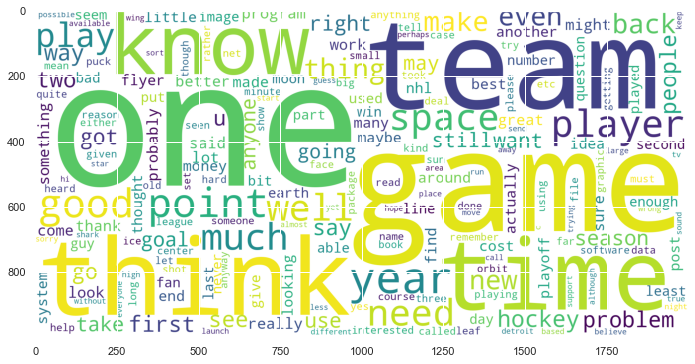

In [79]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_k_mean['text'][1]))
wordcloud2
plt.imshow(wordcloud2)

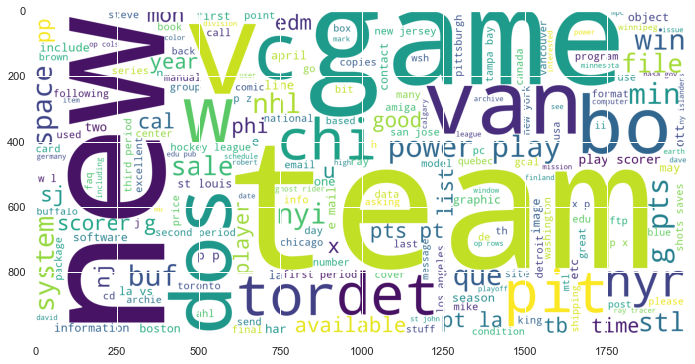

In [80]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_k_mean['text'][2]))
wordcloud2
plt.imshow(wordcloud2)

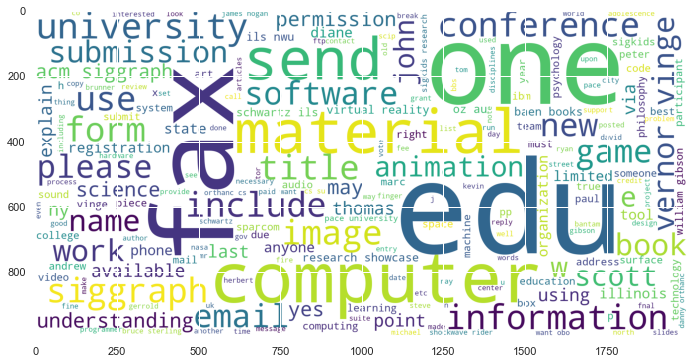

In [81]:
wordcloud2 =WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(" ".join(grouped_df_k_mean['text'][3]))
wordcloud2
plt.imshow(wordcloud2)

In [82]:
for i in range(len(grouped_df_k_mean)):
    words = grouped_df_k_mean['text'][i]
    most_common_words= [word for word, word_count in Counter(words).most_common(20)]
    print(most_common_words)

['space', 'image', 'also', 'data', 'one', 'new', 'use', 'x', 'would', 'available', 'software', 'system', 'nasa', 'edu', 'jpeg', 'program', 'graphics', 'get', 'like', 'first']
['would', 'one', 'like', 'get', 'think', 'know', 'team', 'game', 'time', 'space', 'could', 'good', 'year', 'also', 'much', 'people', 'go', 'season', 'well', 'play']
['p', 'new', 'x', 'edu', 'pts', 'st', 'period', 'vs', 'w', 'la', 'e', 'dos', 'c', 'hockey', 'team', 'space', 'g', 'graphics', 'van', 'pp']
['edu', 'siggraph', 'university', 'one', 'com', 'fax', 'computer', 'books', 'vinge', 'send', 'material', 'information', 'form', 'please', 'software', 'conference', 'email', 'use', 'sigkids', 'schwartz']
